In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score


In [3]:
emotions = ["HAP","SAD","FEA","ANG","DIS","NEU"]
emotion_map = {
    "HAP" : "happy", "ANG" : "angry", "DIS" : "disgust", "FEA" : "fear", "NEU" : "neutral", "SAD" : "sad"
}
def modify(name):
    for emotion in emotions:
        if emotion in name:
            return emotion_map[emotion]+"_emotion"
   
df = pd.read_csv("/kaggle/input/features-238/audio_features_238.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,labels
0,0.053880,0.617539,0.811139,0.684267,0.645353,0.653057,0.581070,0.500327,0.555494,0.619173,...,2.033123e-09,1.980478e-09,1.942450e-09,1.917988e-09,1.902824e-09,137.579643,478.524062,0.019899,0.000526,sad_emotion
1,0.057899,0.650089,0.818181,0.682206,0.657183,0.663493,0.571427,0.498660,0.562175,0.620175,...,5.901530e-06,5.773431e-06,5.637505e-06,5.588681e-06,5.543086e-06,137.579643,478.524062,0.019904,0.000526,sad_emotion
2,0.040943,0.583786,0.617650,0.539153,0.477559,0.497480,0.588687,0.742400,0.693191,0.629113,...,2.521411e-09,2.446560e-09,2.391970e-09,2.356265e-09,2.334235e-09,118.202912,89.584141,0.008818,0.000029,fear_emotion
3,0.048856,0.613743,0.644746,0.567130,0.508735,0.528264,0.605566,0.749047,0.697905,0.633111,...,8.617586e-06,8.645100e-06,8.281470e-06,8.120609e-06,8.397584e-06,117.915978,99.307458,0.008827,0.000029,fear_emotion
4,0.072976,0.596981,0.635761,0.594705,0.577828,0.602860,0.567248,0.490078,0.511397,0.591237,...,1.182389e-09,1.162352e-09,1.148145e-09,1.139805e-09,1.133911e-09,250.703981,899.032983,0.137853,0.022178,anger_emotion


In [5]:
from sklearn.ensemble import RandomForestClassifier

# ==== Step 1: Data Preparation ====

# df = pd.read_csv("/kaggle/input/pann-embeddings/pann_train.csv")
# df = pd.read_csv("/kaggle/input/features-238/audio_features_238.csv")

X = df.drop(columns=['labels'])
y = df['labels']
# Train-test split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



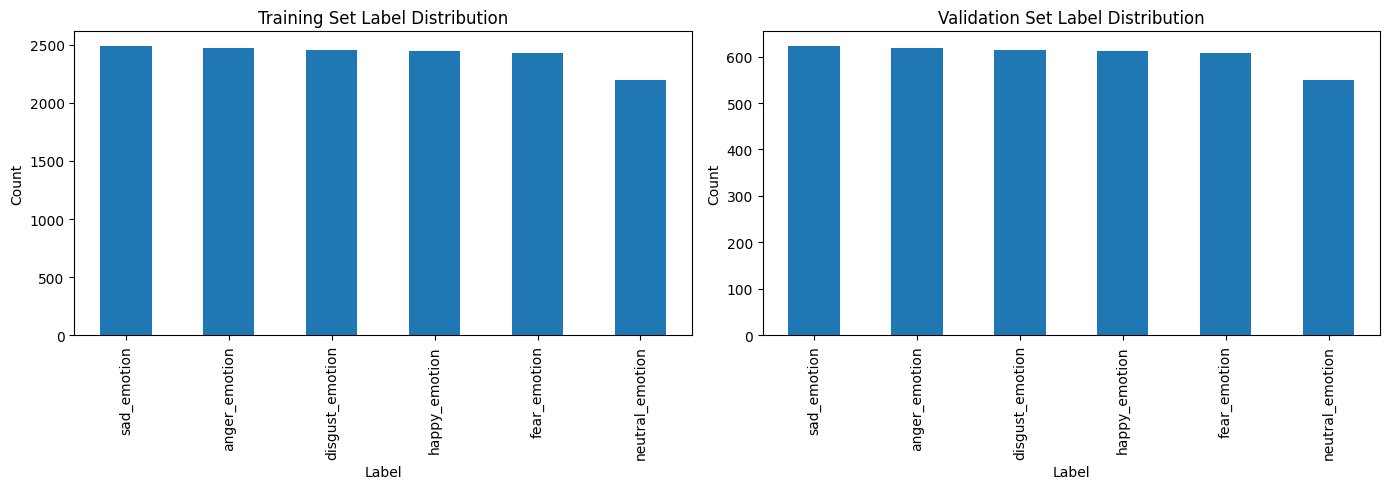

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set Label Distribution')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')



y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Set Label Distribution')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [7]:

# ==== Step 2: Train Random Forest ====
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    max_features = 'sqrt'
)

rf_model.fit(X_train, y_train)
print("random forest model trained!")

random forest model trained!



📊 Evaluation on Train Set:
Accuracy: 0.99993097
Macro F1 Score: 0.99993201
Adjusted Rand Index (ARI): 0.99983198


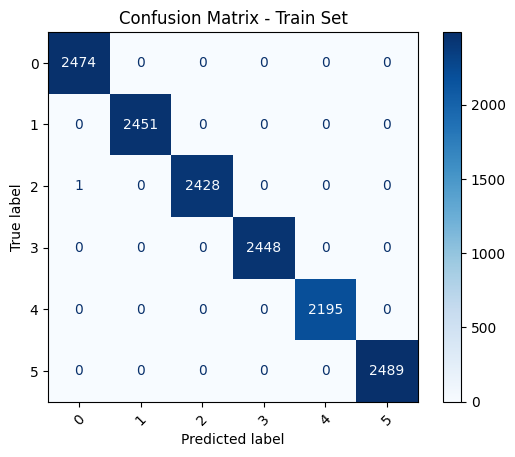


📊 Evaluation on Validation Set:
Accuracy: 0.89425732
Macro F1 Score: 0.89400365
Adjusted Rand Index (ARI): 0.76298880


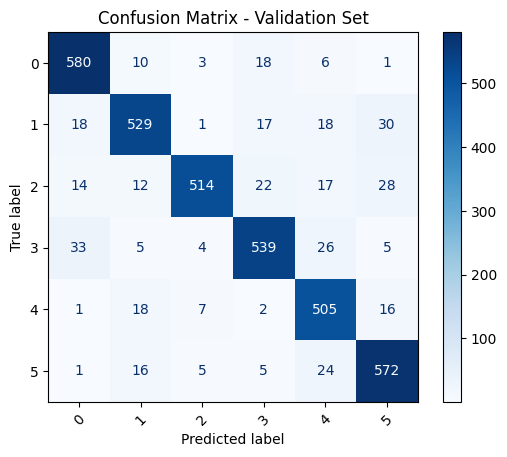

In [9]:

from sklearn.metrics import accuracy_score, f1_score, adjusted_rand_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ==== Step 3: Evaluation Function ====
def evaluate_model(model, X_data, y_data, dataset_name):
    y_pred = model.predict(X_data)
    acc = accuracy_score(y_data, y_pred)
    f1 = f1_score(y_data, y_pred, average='macro')
    ari = adjusted_rand_score(y_data, y_pred)
    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy: {acc:.8f}")
    print(f"Macro F1 Score: {f1:.8f}")
    print(f"Adjusted Rand Index (ARI): {ari:.8f}")

    cm = confusion_matrix(y_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()

# Evaluate on Train
# Evaluate on Validation
evaluate_model(rf_model, X_train, y_train, "Train Set")
evaluate_model(rf_model, X_val, y_val, "Validation Set")
# evaluate_model(rf_model, X1_val, y1_val, "Validation Set 2")

## confusion matrix:


In [19]:
import pandas as pd
# ==== Step 1: Load test file ====
test_df = pd.read_csv("/kaggle/input/features-238/audio_features_238_test.csv")
# Save the path column for submission
test_paths = test_df['labels']
# ==== Step 2: Prepare test features (drop path column) ====
X_test = test_df.drop(columns=['labels'])
# ==== Step 3: Predict using the trained RF model ====
test_predictions = rf_model.predict(X_test)
# ==== Step 4: Create submission dataframe ====
data = pd.DataFrame({
    'ID': test_paths,
    'TARGET': test_predictions
})
# ==== Step 5: Save submission file ====
# submission.to_csv("submission_rf.csv", index=False)
# print("✅ Submission file saved as submission_rf.csv")


In [20]:
data.head(3)

,ID,TARGET
0,test/2217.wav,happy_emotion
1,test/1078.wav,anger_emotion
2,test/2571.wav,happy_emotion


In [21]:

def modify_id(id) :
    return id.split('/')[1]
# Convert the entries in the TARGET column
data['ID'] = data['ID'].apply(modify_id)
# Extract numbers from the ID column and sort the data
data['ID_NUMBER'] = data['ID'].apply(lambda x: int(x.split('.')[0]))
data = data.sort_values(by='ID_NUMBER')
# Drop the temporary ID_NUMBER column
data = data.drop(columns=['ID_NUMBER'])
# Save the result to a new CSV file
data.to_csv('submission_rf_3.csv', index=False)